<a href="https://colab.research.google.com/github/Pachuchka/Python/blob/main/ML_Py_lib_sem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [12]:
import pandas as pd

file_path = '/content/gdrive/My Drive/GeekBrains/ML pyLib/WineQT.csv'
df_wine = pd.read_csv(file_path)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


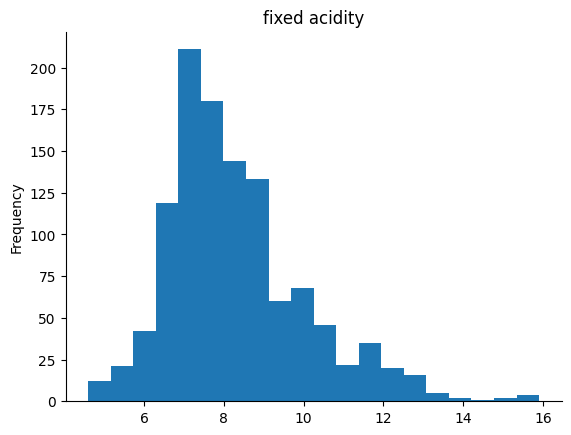

In [13]:
# @title fixed acidity

from matplotlib import pyplot as plt
df_wine['fixed acidity'].plot(kind='hist', bins=20, title='fixed acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

Импортируем наиболее популярные библиотеки

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [15]:
df_wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


Ура, в дата-сете нет пропусков!
Преобладают вещественные численные типы данных


Анализ статистических характеристик

Непрерывными показателями являются все  кроме id b quality

In [16]:
continuous_features = ['fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar',	'chlorides',	'free sulfur dioxide',	'total sulfur dioxide',	'density',	'pH',	'sulphates',	'alcohol']

In [17]:
df_wine['quality']=df_wine['quality'].astype('object')

In [18]:
df_wine.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [19]:
df_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


Вывод: Судя по разнице между средним и min, а так же средним и max, по показателям citric acid, free sulfur dioxide и total sulfur dioxide могут быть либо выбросы данных, либо их смещение в распределении, лучше визуализировать распределение графически

In [20]:
df_wine.describe(include='object')

,quality
count,1143
unique,6
top,5
freq,483


from matplotlib import pyplot as plt
_df_0['quality'].plot(kind='hist', bins=20, title='quality')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['quality'].plot(kind='line', figsize=(8, 4), title='quality')
plt.gca().spines[['top', 'right']].set_visible(False)

Для показателя Quality предусмотрено 6 уникальных значений, наиболее частое: 5

Распределение количественных данных.
Одномерный анализ


In [32]:
print(df_wine[continuous_features])


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

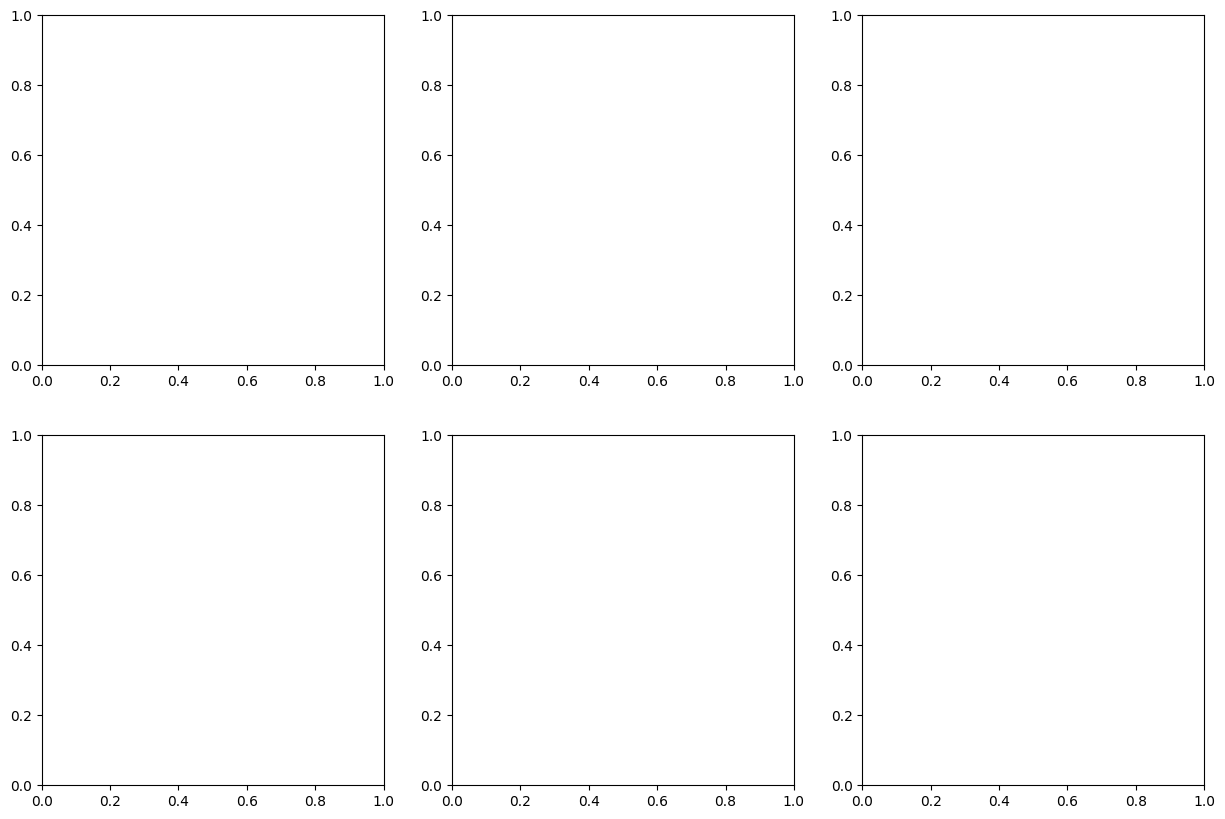

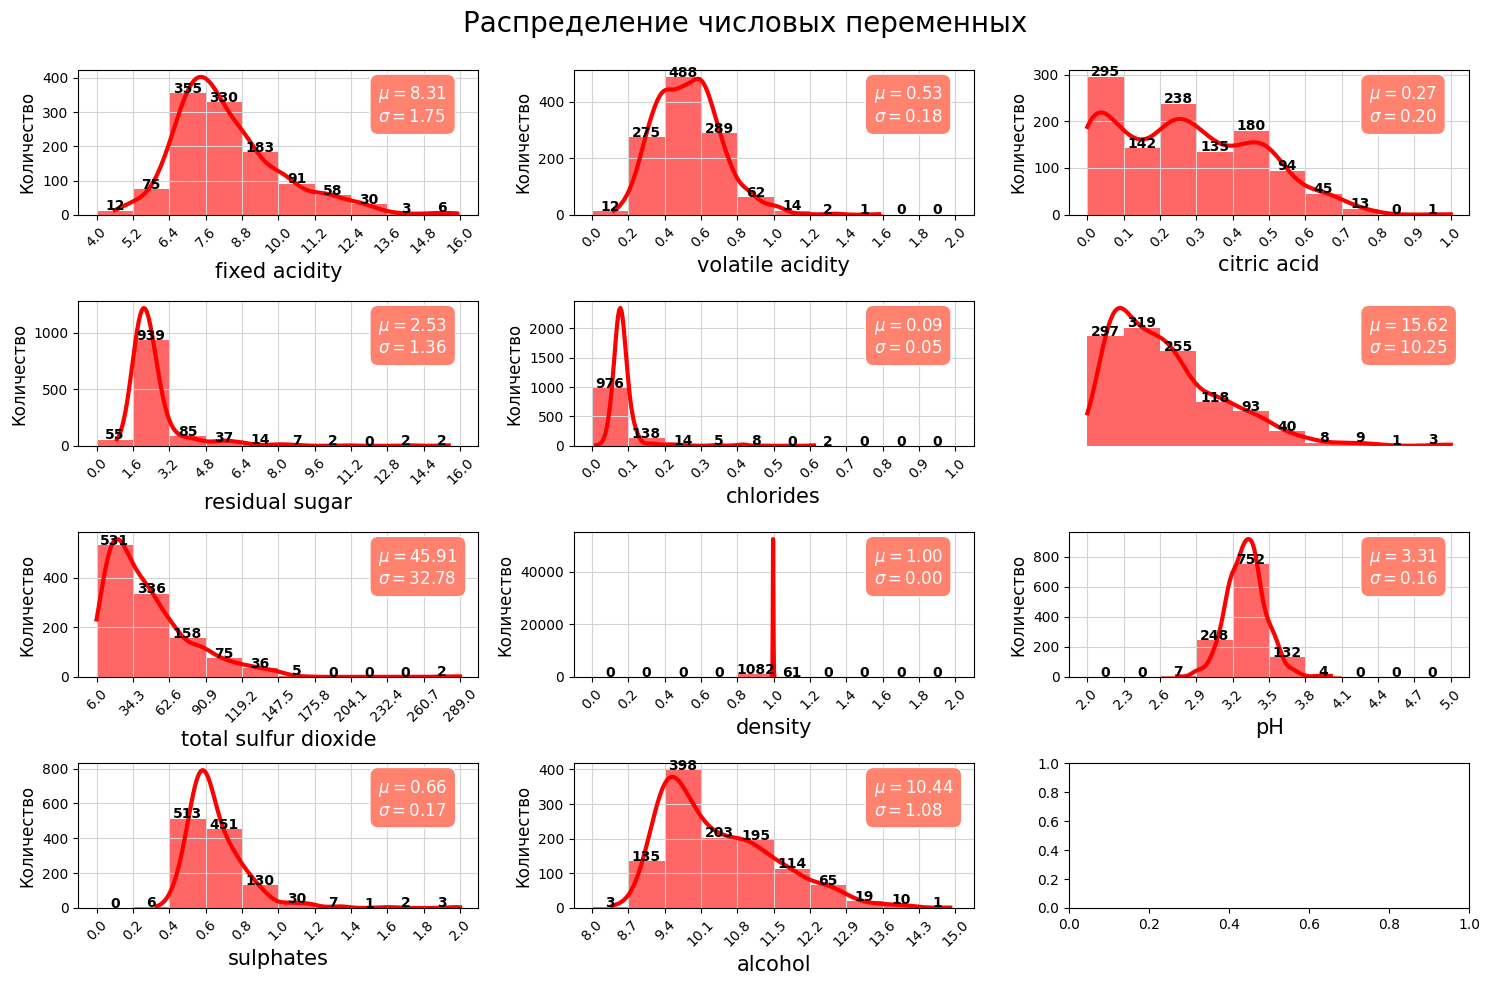

In [36]:
df_continuous = df_wine[continuous_features]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))


# Определяем количество подграфиков
num_features = len(df_continuous.columns)
ncols = 3  # Количество столбцов подграфиков
nrows = (num_features + ncols - 1) // ncols  # Округление вверх

# Создаем подграфики
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
for i, col in enumerate(df_continuous.columns):
    x = i // ncols  # Индекс строки
    y = i % ncols

    values, bin_edges = np.histogram(df_continuous[col],
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))

    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

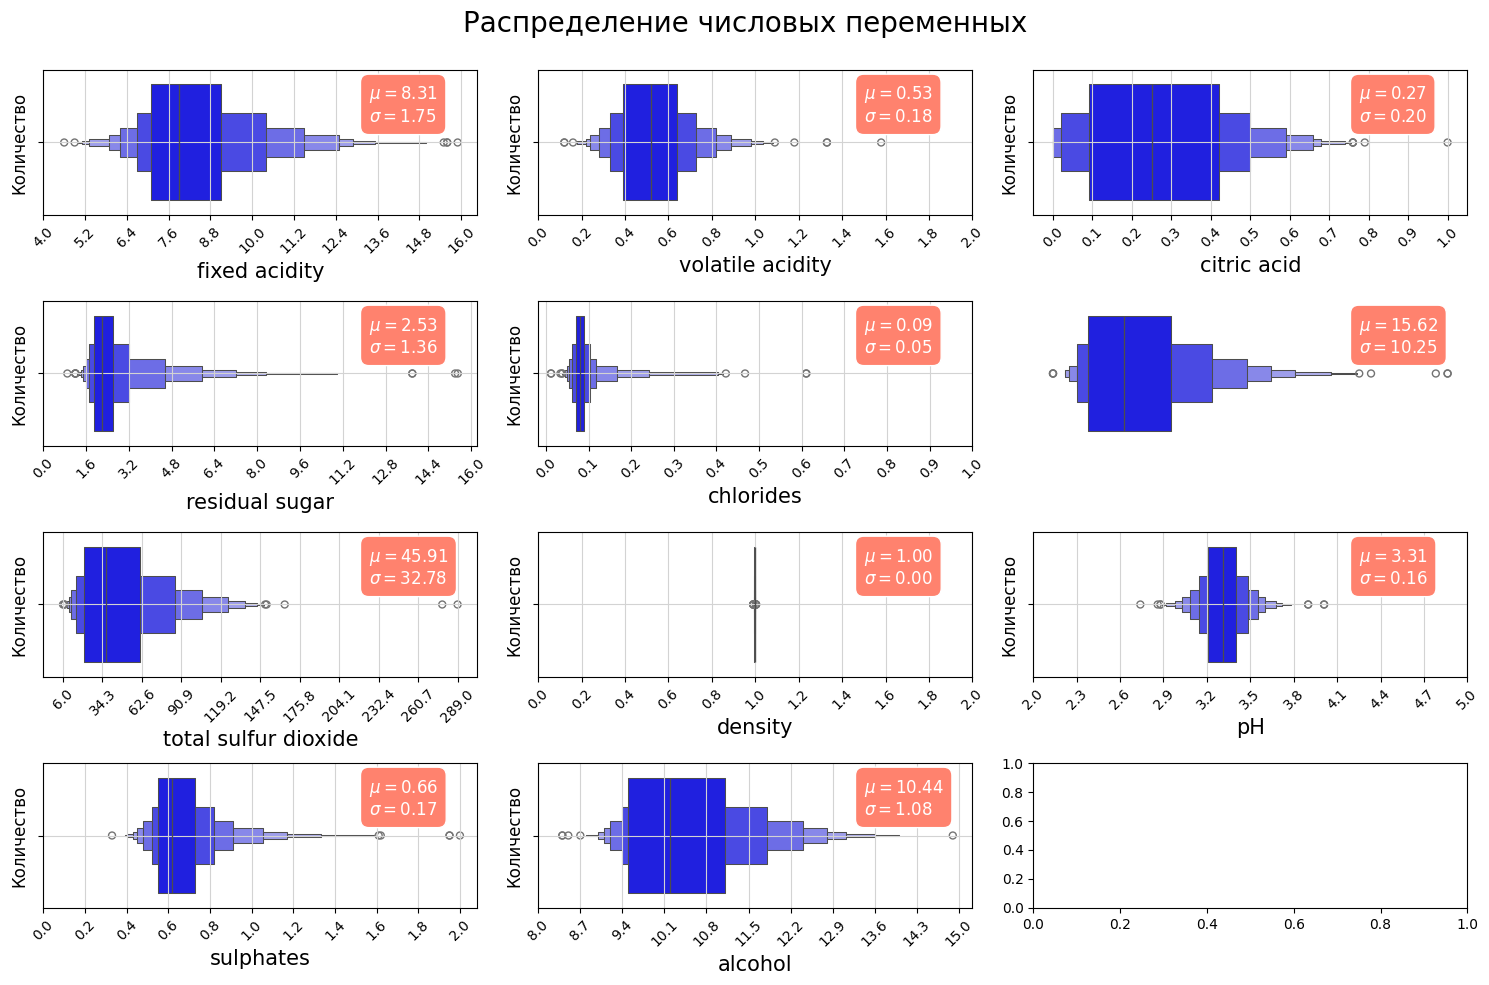

In [45]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
num_features = len(df_continuous.columns)
ncols = 3  # Количество столбцов подграфиков
nrows = (num_features + ncols - 1) // ncols  # Округление вверх

# Цикл для построения гистограмм для каждого непрерывного признака
for i, col in enumerate(df_continuous.columns):
    x = i // ncols  # Индекс строки
    y = i % ncols
    values, bin_edges = np.histogram(df_continuous[col],
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))

    graph = sns.boxenplot(data=df_continuous, x=col, ax=ax[x, y],
                         color='blue')
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')


    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

 1 График распределения переменной Fixed acidity (фиксированная кислотность)
демонстрирует нам относительно нормальное распределение со смещением влево, в пользу менее кислотных вин, среднее значение кислотности 8.31, стандартное отклонение 1.75

 2 График распределения переменной volatile acidity (летучая кислотность) так же демонстрируем относительно нормальное распределение со смещением влево, в пользу менее кислотных вин, среднее значение кислотности 0.53, стандартное отклонение 0.18, вероятно первые две переменные связаны между собой, чем ниже фиксированная кислотность, тем ниже и летучая.

 3 График распределения переменной critic acid (лимонная кислота) демонстрирует распределение не похожее на нормальное, обладает тремя локлаьными экстремумами от 0 до 0.1, от 0.2 до 0.3 и от 0.4 до 0.5 - возможно это связано с категориями вин.

 4 и 5 Графики показывают нормальное распределение с очень маленьким отклонением и, возможно с выбросами справа - значениями сильно отличающимися от 90% других.

 6 и 7 Графики похожи между собой и демонстрируют распределение с сильным смещением влево, не являющимся нормальным, математические ожидания и отклонения соответственно (15.62 и 10.25) и (45.91 и 32.78), данные распределения возможно говорят о зависимости этих переменных (free sulfur dioxide и total sulfur dioxide).

 Распределение dencity (плотность) не является нормальным и сосредоточено в близи значения 1 с возможными выбросами менее 0.9

 Распределение PH имеет классический нормальный вид с математическим ожиданием 3.31 и отклонением 0.16

 Сульфаты и содержание алкоголя так же обладают нормальным распределением со сдвигом вправо

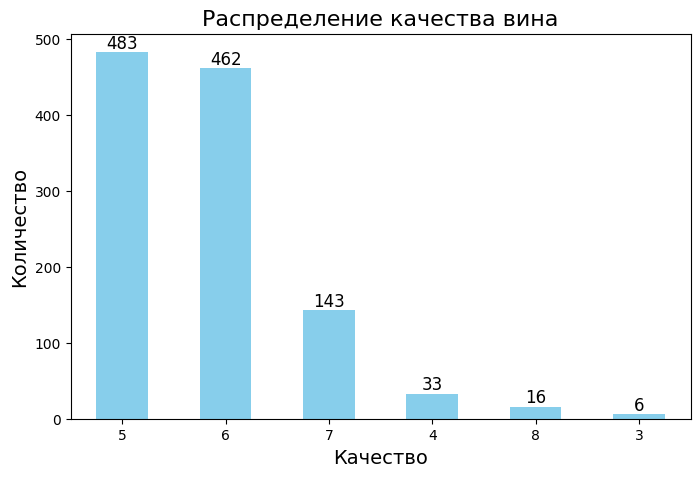

In [50]:

quality_counts = df_wine['quality'].value_counts()


plt.figure(figsize=(8, 5))  # Установка размера фигуры
bars = quality_counts.plot(kind='bar', color='skyblue')  # Создание столбчатой диаграммы

# Добавление заголовков и меток
plt.title('Распределение качества вина', fontsize=16)  # Заголовок диаграммы
plt.xlabel('Качество', fontsize=14)  # Метка по оси X
plt.ylabel('Количество', fontsize=14)  # Метка по оси Y


for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             int(bar.get_height()), ha='center', va='bottom', fontsize=12)


plt.xticks(rotation=0)
plt.show()

Итоговые выводы:
Не смотря на выборку из 1143 измерений, данных по категориям качества: 3,4,7,8 не достаточно, не уверен в том что анализировать зависимости других характеристик и качества имеет смысл. Сравнимыми могут быть лишь вина с качественной оценкой 5 и 6.

Прослеживаются взаимосвязи кислотности - фиксированной и летучей, скорее всего эти показатели взаимосвязаны.

Плотность, скорее всего является лишним показателем, особенно если измерения со значением плотности являются выбросами

Сульфаты и алкоголь тоже скорее всего взаимосвязаны